In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(6)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195


In [3]:
# Check the dimensions of the data
print('Shape of data: {}'.format(df_market_data.shape))

Shape of data: (41, 7)


In [4]:
# Check for missing data
df_market_data.isna().sum()

price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64

In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_scaled = StandardScaler().fit_transform(df_market_data)


In [8]:
# Get the columns of the original dataset
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [9]:
# Get the Index title of the original dataset
df_market_data.index.name

'coin_id'

In [10]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(market_scaled, columns=[
                                                        'price_change_percentage_24h', 'price_change_percentage_7d',
                                                        'price_change_percentage_14d', 'price_change_percentage_30d',
                                                        'price_change_percentage_60d', 'price_change_percentage_200d',
                                                        'price_change_percentage_1y'
                                                        ])

# Copy the crypto names from the original data
df_market_scaled['coin_id'] = df_market_data.index
# Set the coinid column as index
df_market_scaled = df_market_scaled.set_index('coin_id')

# Display sample data
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [11]:
# After scaling data, generate summary statistics
df_market_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Finding the Best Value for k Using the Original Data.

In [12]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [13]:
# Create an empty list to store the inertia values
inertia = []

# Create a KMeans model using the loop counter for the n_clusters
# Fit the model to the data using `df_market_data_scaled`
# Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_scaled)
    inertia.append(k_model.inertia_)


c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [14]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k, "inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [15]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_orig_df = df_elbow.hvplot.line(
                        x="k", 
                        y="inertia", 
                        title="Elbow Curve for Original Data", 
                        xticks=k
                    )
#display elbow curve
elbow_plot_orig_df

:Curve   [k]   (inertia)

### Discussion:

> `From the elbow curve above, 4 seems to be the best number of centroids to use in the kMeans clustering algorithm.`

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [16]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [17]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_market_scaled)

# Print the resulting array of cluster values.
print("cluster values for scaled data: {}".format(k_4))

cluster values for scaled data: [3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [19]:
# Create a copy of the DataFrame
df_market_predictions = df_market_scaled.copy()

In [20]:
# Add a new column to the DataFrame with the predicted clusters
df_market_predictions["predicted_clusters"] = k_4

# Display sample data
df_market_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [21]:
# Select only two features: "price_change_percentage_24h" and "price_change_percentage_7d"
# Create a scatter plot of these features using hvPlot by setting 
scatter_plot_orig_df = df_market_predictions.hvplot.scatter(
    x= "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    by = "predicted_clusters", 
    hover_cols = ["coin_id"],
    title = "Scatter Plot by Original Scaled dataset clusters"
)
#display plot
scatter_plot_orig_df

:NdOverlay   [predicted_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [22]:
# Create a PCA model instance
# set `n_components=3`.
pca = PCA(n_components=3)

In [23]:
# Use the PCA model with `fit_transform` to reduce dimension
# of dataset to three principal components.
market_pca_data = pca.fit_transform(df_market_scaled)
# View the first five rows of the DataFrame. 
market_pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [24]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca_var = pca.explained_variance_ratio_
pca_var

array([0.3719856 , 0.34700813, 0.17603793])

In [25]:
# Create a function to sum
def sum(list):
    total = 0
    for i in list:
        total += i
    return round(total,3)

In [26]:
#sum the pca variance
sum (pca_var)

0.895

### Discussion
> `The total explained variance of the three principal components is 89.5%. This means that although we reduced the dimension of the scaled data to 3 but only lost the ability to explain 10.5% of the variance in the dataset.`


In [27]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(market_pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
df_market_pca['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index("coin_id")

# Display sample data
df_market_pca.head(5)


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [28]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1,11))

In [29]:
# Create an empy list to store the inertia values
inertia_pca_data = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_pca:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_pca)
    inertia_pca_data.append(model.inertia_)


c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [30]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca_data = {"k":k, "inertia":inertia_pca_data}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca_data = pd.DataFrame(elbow_pca_data)
df_elbow_pca_data.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


In [31]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca_df = df_elbow_pca_data.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve for the PCA Dimension Reduction Data", 
    xticks=k
)
# display elbow curve
elbow_plot_pca_df

:Curve   [k]   (inertia)

### Discussion
> `The elbow curve for the PCA dimension redution data shows a best k-value of 4. This is perhaps more pronounced compared to the best predicted k-value in the original dataset.`

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [32]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4)

In [33]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca)

c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\shade\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4_pca = model.predict(df_market_pca)
# Print the resulting array of cluster values.
print("cluster values for PCA data: {}".format(k_4_pca))

cluster values for PCA data: [3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [35]:
# Create a copy of the DataFrame with the PCA data
df_market_pca_predictions = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_pca_predictions["predicted_clusters"]= k_4_pca

# Display sample data
df_market_pca_predictions.head()

,PC1,PC2,PC3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


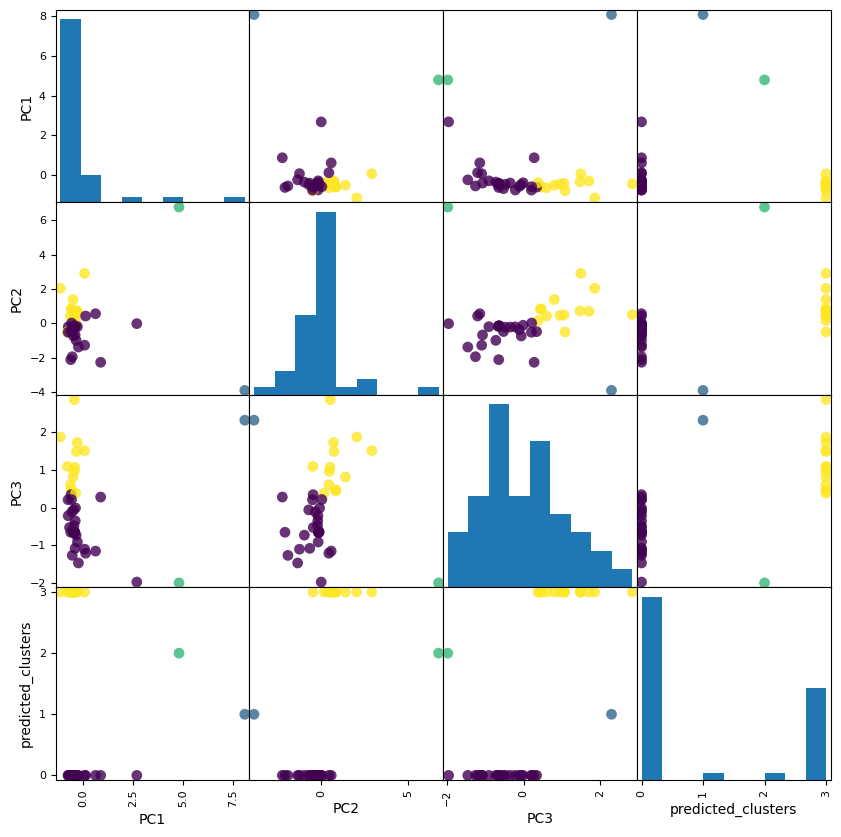

In [36]:
# Scatter plot of the three reduced PCA dimensions 
PCA_features_plot = pd.plotting.scatter_matrix(df_market_pca_predictions, 
                                   c= df_market_pca_predictions.predicted_clusters,
                                    figsize =(10,10), marker ='o', 
                                    hist_kwds ={'bins':9},s=60,alpha=.8)

In [37]:
# Correlation between PCAs
df_market_pca_predictions[["PC1","PC2","PC3"]].corr()

,PC1,PC2,PC3
PC1,1.000000e+00,3.532928e-16,-1.118649e-16
PC2,3.532928e-16,1.000000e+00,1.318637e-16
PC3,-1.118649e-16,1.318637e-16,1.000000e+00


### Discussion 
> `A scatter plot of the three reduced PCAs shows a clear distinction amongst the clusters. However, we do not know which of the columns are present in each of the PCAs. As revealed from the correlations, no linear relationships exists amongst these PCAs.`

### Input the "predicted clusters" from the PCA reduced dimension prediction into the original scaled data

In [38]:
# Create another copy of the scaled DataFrame
df_market_pca_scaled_predictions = df_market_scaled.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_pca_scaled_predictions["predicted_clusters"] = k_4_pca
df_market_pca_scaled_predictions.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [39]:
# Select again "price_change_percentage_24h" and "price_change_percentage_7d" features
# Create a scatter plot of these features using hvPlot by setting 
scatter_plot_pca_scaled_df = df_market_predictions.hvplot.scatter(
                                x= "price_change_percentage_24h",
                                y = "price_change_percentage_7d",
                                by = "predicted_clusters", 
                                hover_cols = ["coin_id"],
                                title = "Scatter Plot by PCA Clusters"
                            )
#display plot
scatter_plot_pca_scaled_df

:NdOverlay   [predicted_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [40]:
# Composite plot to contrast the clusters from orignial scaled dataset and 
# the PCA reduced dimensional clusters
scatter_plot_pca_scaled_df + scatter_plot_orig_df

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

### Discussion 

> `The scatter plot above only strengthens the earlier observation from the elbow curve in the original scaled dataset and the PCA transformed dataset. The best centroids were observed to be around 4 for both curves. In other words no differences were noticed when clusters are predicted from the scaled dataset nor when predicted from the reduced dimensionality.`

### Create a scatter plot by setting x="PC1" and y="PC2"

In [41]:
# Select only PCA1 and PCA2
# Create a scatter plot for PCA1 and PCA3 using hvPlot by setting 
scatter_plot_pca_df = df_market_pca_predictions.hvplot.scatter(
                            x= "PC1",
                            y = "PC2",
                            by = "predicted_clusters", 
                            hover_cols = ["coin_id"],
                            title = "Scatter Plot of PC1 and PC2 by Predicted clusters"
)
scatter_plot_pca_df

:NdOverlay   [predicted_clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

Visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [42]:
# Composite plot to contrast the Elbow curves
elbow_plot_orig_df + elbow_plot_pca_df

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [43]:
# Composite plot to contrast the clusters
scatter_plot_pca_df + scatter_plot_orig_df

:Layout
   .NdOverlay.I  :NdOverlay   [predicted_clusters]
      :Scatter   [PC1]   (PC2,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

#### Discusion
`After visually analyzing the cluster analysis results (i.e., between PC1 and PC2 versus the original scaled dataset), we can conclude that reducing the dimension of the data to 3 PCA provides distinct clusters that may be relied upon to interpret the differences between the crypto price change.`